In [1]:
import compton.Dataloader as dl
from compton.Functions import *
from compton.Analysis import *
import os
from sympy import symbols, Eq, latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import pandas as pd

In [2]:
print(os.getcwd())

/home/lucas/repos/advanced_exp/FAFO


In [3]:
data = dl.load_gamma_count('../Databases/Compton/BBL_S0_A0.csv')
display(data)

,Channel,Energy (keV),Counts
0,1,0.755920,0
1,2,1.511840,0
2,3,2.267760,0
3,4,3.023679,0
4,5,3.779599,0
...,...,...,...
1019,1020,771.038271,36
1020,1021,771.794191,34
1021,1022,772.550111,39
1022,1023,773.306031,51


In [4]:
display(data)
channel = data['Channel']
energy = data['Energy (keV)']
count = data['Counts']

,Channel,Energy (keV),Counts
0,1,0.755920,0
1,2,1.511840,0
2,3,2.267760,0
3,4,3.023679,0
4,5,3.779599,0
...,...,...,...
1019,1020,771.038271,36
1020,1021,771.794191,34
1021,1022,772.550111,39
1022,1023,773.306031,51


In [5]:
angles = range(0,140, 10)
all_info = []

for ii in range(len(angles)):
    data = dl.load_gamma_count('../Databases/Compton/BBL_S1_A' + str(angles[ii]) + '.csv')
    all_info.append(data)

In [6]:
print(len(all_info))

14


In [7]:
# control = pd.read_csv('../Databases/Compton/BBL_S0_A0.csv', skiprows=8)

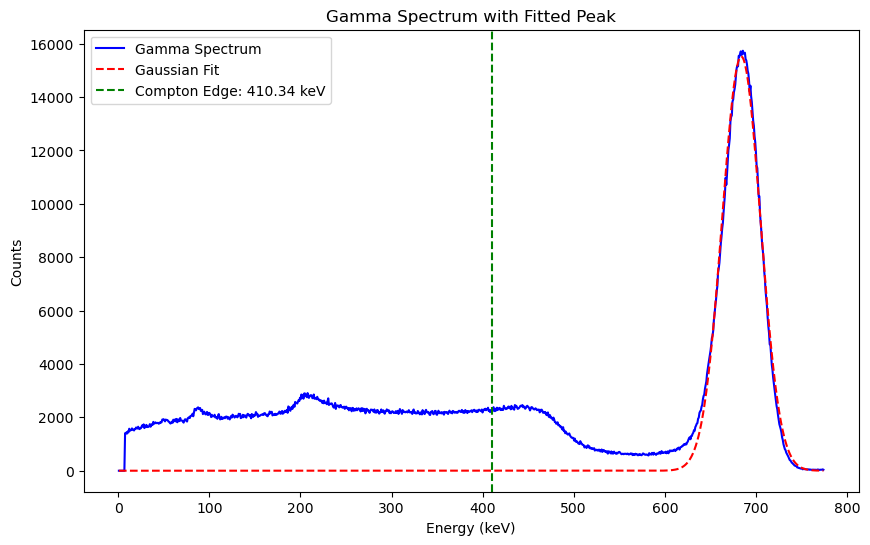

In [8]:
from scipy.optimize import curve_fit

# Load data
control = dl.load_gamma_count('../Databases/Compton/BBL_S0_A0.csv')

data = control.values  # Convert DataFrame to NumPy array
energy = data[:, 1]  # Energy values
counts = data[:, 2]  # Counts

# Plot raw data
plt.figure(figsize=(10, 6))
plt.plot(energy, counts, label='Gamma Spectrum', color='blue')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Gamma Spectrum with Fitted Peak')

# Fit Gaussian to the peak region
peak_idx = np.argmax(counts)
peak_energy = energy[peak_idx]
initial_guess = [max(counts), peak_energy, 50]  # Amplitude, mean, std dev
popt, _ = curve_fit(gaussian, energy, counts, p0=initial_guess)

# Plot Gaussian fit
fit_x = np.linspace(min(energy), max(energy), 1000)
fit_y = gaussian(fit_x, *popt)
plt.plot(fit_x, fit_y, label='Gaussian Fit', color='red', linestyle='--')

# Estimate and mark the Compton edge
comp_edge = compton_edge(peak_energy)
plt.axvline(comp_edge, color='green', linestyle='dashed', label=f'Compton Edge: {comp_edge:.2f} keV')

plt.legend()
plt.show()


[-1.80316811e+03  2.47196601e+03  7.63388343e-02  4.88237766e+02]


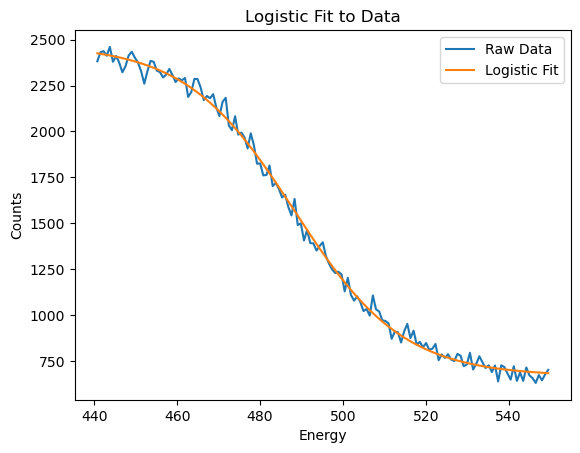

logistic regression center: 488.237766490051, uncertainty 0.29975426469643784


In [9]:
#Trim ROi for logistic regression fit on compton edge
edge_trim_df = trim_df(control, 440, 550)
popt, pcov = logistic_fit(edge_trim_df)
print(popt)
plot_logistic_fit(edge_trim_df,)
print(f"logistic regression center: {popt[3]}, uncertainty {np.sqrt(pcov[3][3])}")


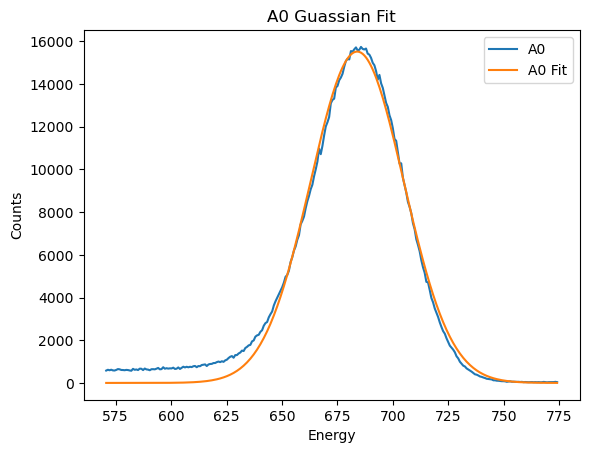

,Angle,Mean,Sigma,Unc Mean,Unc Sigma
0,0,683.890229,21.057968,0.128233,0.128233


In [10]:
#trim ROI for guassian fit
guass_trim_df = trim_df(control, 570, 800)
baseline = run_all_S1_fits([guass_trim_df])
plot_guassian_fit(guass_trim_df)
display(baseline)
E = baseline['Mean'][0]
sig_E = baseline['Unc Mean'][0]

The following cell runs analysis of each of the S1 datasets (scattering material included) for each angle, reporting in a dataframe.

In [11]:
mins = minimum_energy_S1()
maxs = maximum_energy_S1()
trimmed_info = trim_S1_dfs(all_info, mins, maxs)
peaks = run_all_S1_fits(trimmed_info)
display(peaks)

,Angle,Mean,Sigma,Unc Mean,Unc Sigma
0,0,679.598900,-20.348666,0.117494,0.155081
1,10,679.945954,-20.378033,0.088942,0.117550
2,20,674.986779,-21.482497,0.269837,0.438097
3,30,558.031366,58.600076,1.162540,2.150857
4,40,515.726324,43.835821,0.913021,1.245304
5,50,463.727047,38.509985,0.767230,0.975919
6,60,416.661249,37.841536,0.912489,1.110698
7,70,373.349287,35.145004,0.966650,1.135540
8,80,334.383051,-29.049704,0.793145,0.938642
9,90,303.675702,-25.193505,0.911855,1.054495


This next cell allows you to plot all the graphs if you so desire, to see the fits

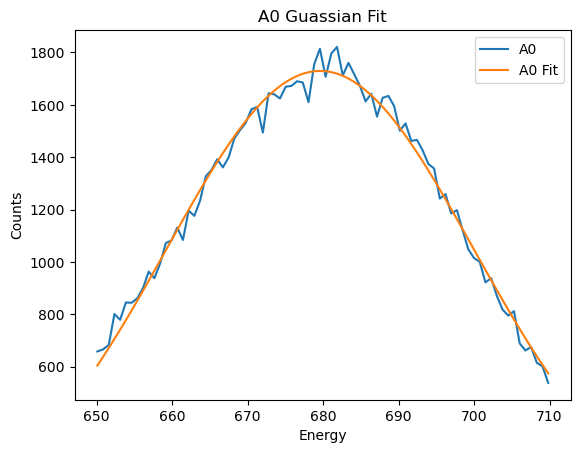

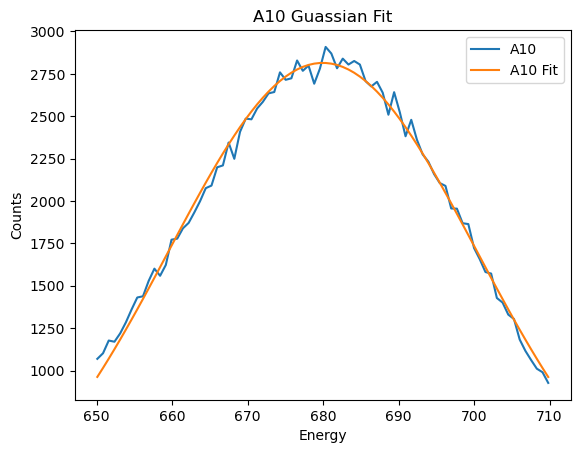

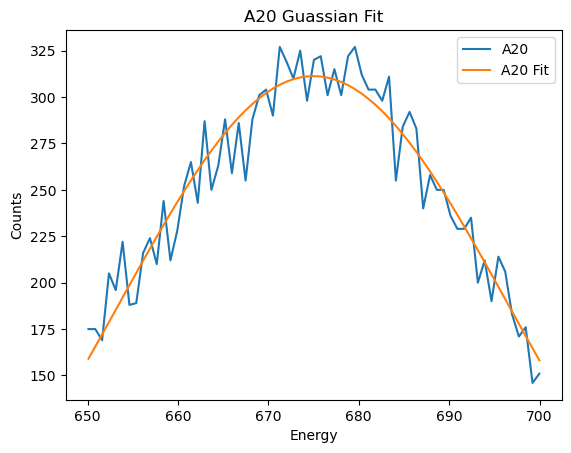

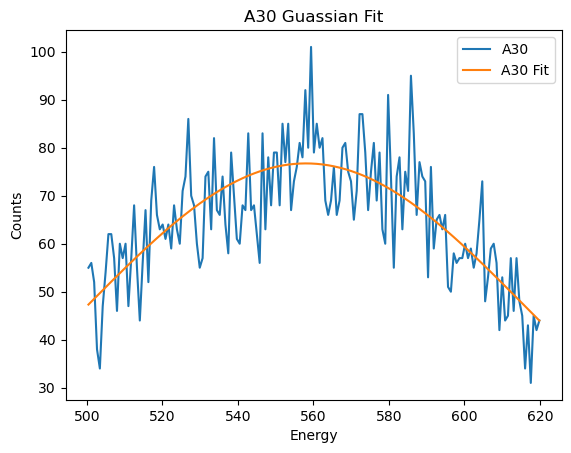

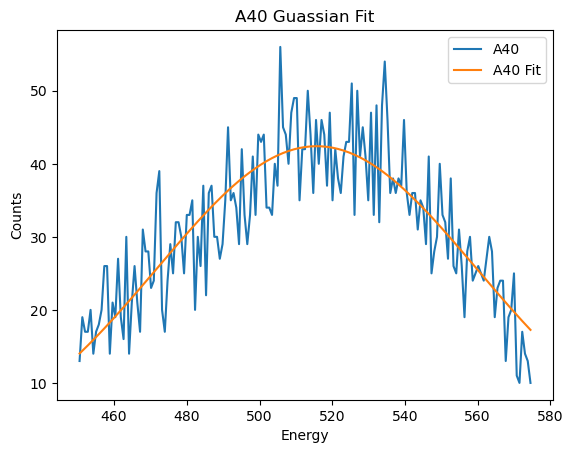

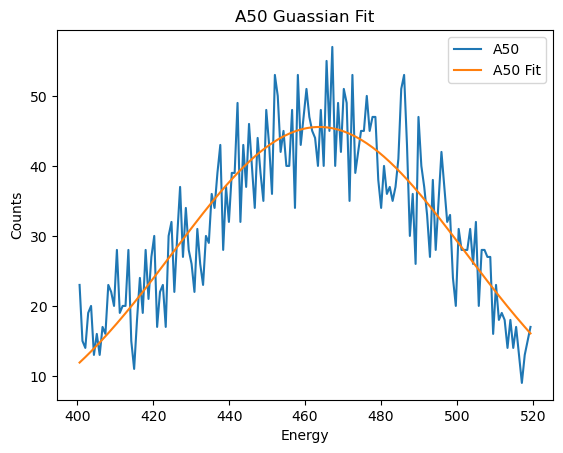

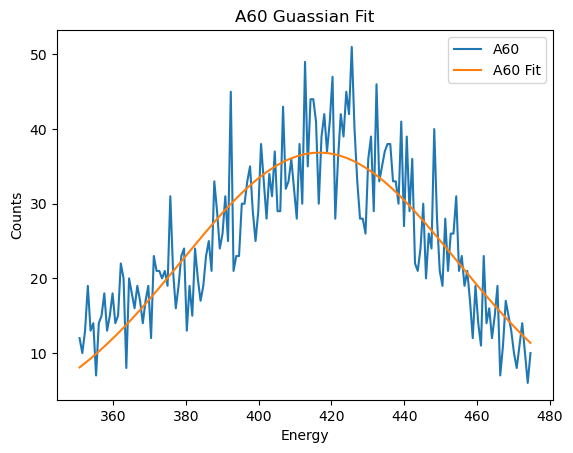

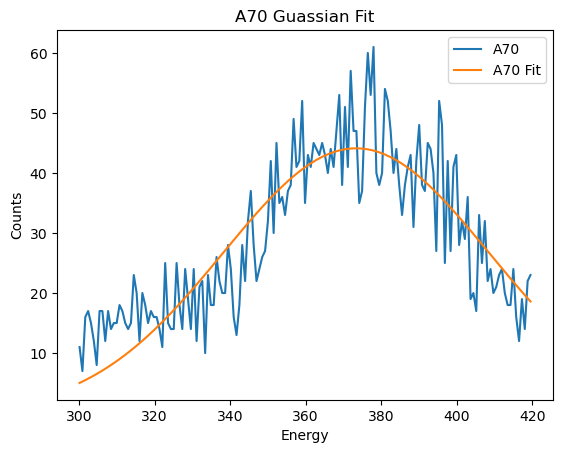

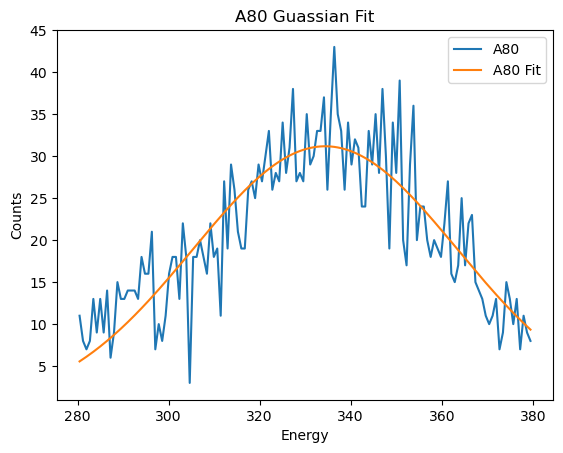

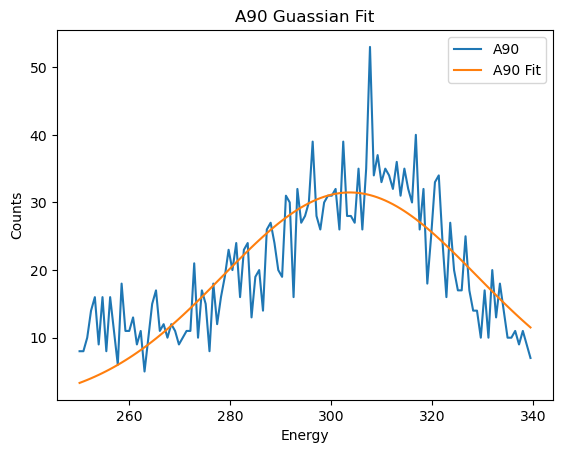

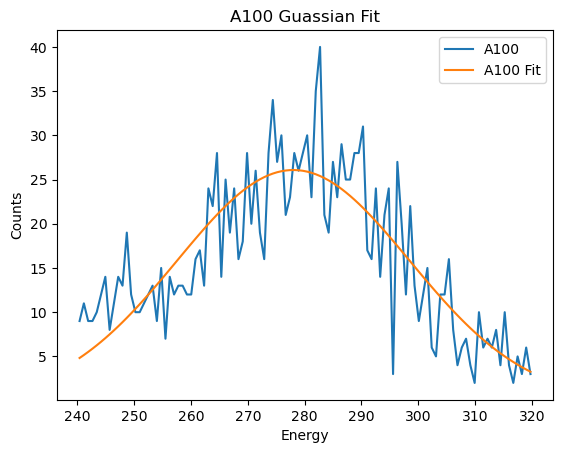

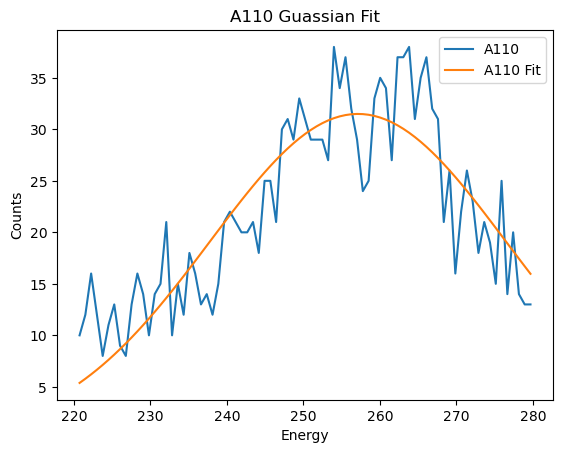

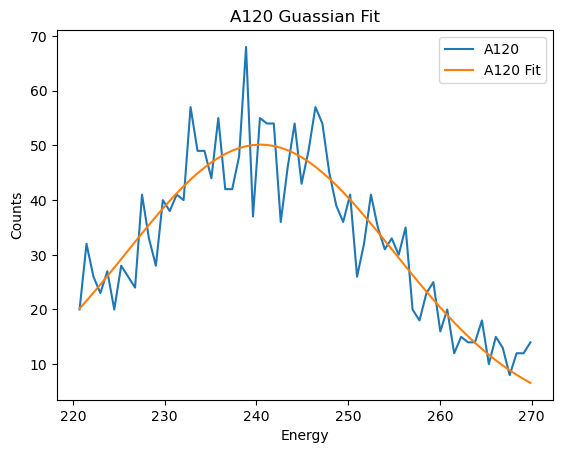

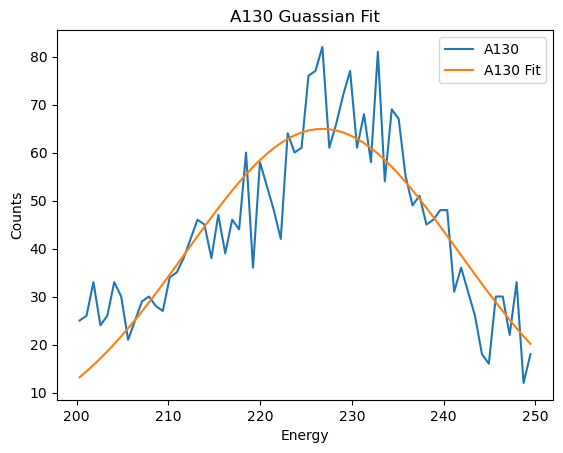

In [12]:
plot_all_S1_fits(trimmed_info)

Finally, we have to plot E/E' over 1/cos(theta)
our code starts by calculating E/E'(with uncertainty)and 1-cos(theta) as new Collumns, then runs a fit on the data and plots it.

,Angle,Mean,Sigma,Unc Mean,Unc Sigma,E/E',Unc E/E',1-cos(theta)
0,0,679.598900,-20.348666,0.117494,0.155081,0.993725,0.000253,0.000000
1,10,679.945954,-20.378033,0.088942,0.117550,0.994233,0.000227,0.015192
2,20,674.986779,-21.482497,0.269837,0.438097,0.986981,0.000436,0.060307
3,30,558.031366,58.600076,1.162540,2.150857,0.815966,0.001707,0.133975
4,40,515.726324,43.835821,0.913021,1.245304,0.754107,0.001343,0.233956
5,50,463.727047,38.509985,0.767230,0.975919,0.678072,0.001129,0.357212
6,60,416.661249,37.841536,0.912489,1.110698,0.609252,0.001339,0.500000
7,70,373.349287,35.145004,0.966650,1.135540,0.545920,0.001417,0.657980
8,80,334.383051,-29.049704,0.793145,0.938642,0.488943,0.001163,0.826352
9,90,303.675702,-25.193505,0.911855,1.054495,0.444042,0.001336,1.000000


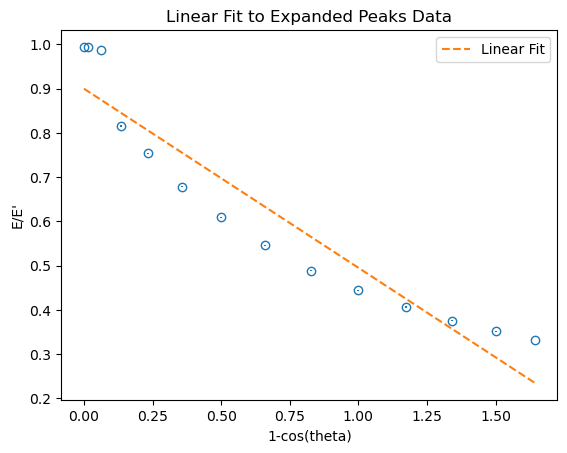

-0.4048735794102875 0.038814398297427145 0.9000220852967219 0.03392838820466143


In [13]:
peaks = dl.expand_df(peaks, E, sig_E)
display(peaks)
slope, unc_slope, intercept, unc_intercept = linear_fit_plot(peaks[:])
print(slope, unc_slope, intercept, unc_intercept)